In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 1. Load the data

In [41]:
df_Diabetes=pd.read_csv("C:/Users/Dell/Downloads/NHANES_Diet_Diabetes_Risk.xls.csv")
df_Diabetes.head(5)

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,Diabetes_Risk
0,73557,16888.32786,12930.89065,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,73558,17932.14387,12684.14887,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2
2,73559,59641.81293,39394.23671,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,73561,59052.35703,39004.89299,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0
4,73562,49890.82866,0.00000,1,49.0,2.0,1.0,11.0,3.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0


### 2. Preprocess the Data

In [42]:
#Set SEQN as the index
df_Diabetes=df_Diabetes.set_index('SEQN')
df_Diabetes.head(5)

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,...,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,Diabetes_Risk
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,16888.32786,12930.89065,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73558,17932.14387,12684.14887,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2
73559,59641.81293,39394.23671,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73561,59052.35703,39004.89299,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0
73562,49890.82866,0.00000,1,49.0,2.0,1.0,11.0,3.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0


In [43]:
df_Diabetes.columns

Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T', 'DRD370TQ',
       'DRD370U', 'DRD370UQ', 'DRD370V', 'Diabetes_Risk'],
      dtype='object', length=168)

In [76]:
df_Diabetes.shape

(6643, 168)

In [48]:
#Train Test Split
y=df_Diabetes['Diabetes_Risk']
x=df_Diabetes.drop(columns='Diabetes_Risk')
trainx, testx, trainy, testy = train_test_split(x,y, random_state=42)

In [49]:
#Impute Missing Values with the median value
imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
imputer.fit(trainx)

SimpleImputer(strategy='median')

In [50]:
trainx_tf=imputer.transform(trainx)

In [51]:
testx_tf=imputer.transform(testx)

In [54]:
#Scale
scale = StandardScaler()
scale.fit(trainx_tf)
trainx_tf=scale.transform(trainx_tf)
testx_tf=scale.transform(testx_tf)

### 3. Model - No PCA

In [56]:
#Fit a default KNN model to the data.
neigh = KNeighborsClassifier()
neigh.fit(trainx_tf, trainy)

KNeighborsClassifier()

In [57]:
%%time
preds_train = neigh.predict(trainx_tf)
preds_test = neigh.predict(testx_tf)

CPU times: total: 4.92 s
Wall time: 1.24 s


In [58]:
#Evaluate the model using multiple appropriate metrics
#Custom Function

In [60]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

In [59]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4085
           1       0.49      0.04      0.08       437
           2       0.68      0.04      0.08       460

    accuracy                           0.82      4982
   macro avg       0.66      0.36      0.35      4982
weighted avg       0.78      0.82      0.75      4982



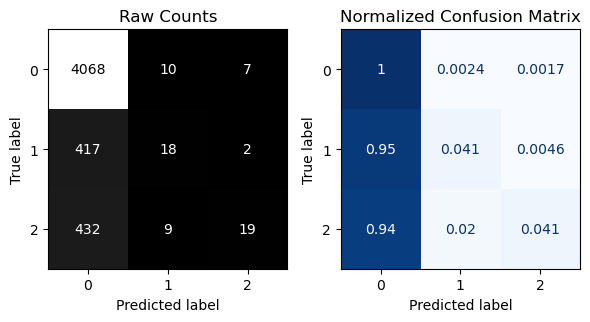


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1367
           1       0.25      0.03      0.05       150
           2       0.27      0.02      0.04       144

    accuracy                           0.82      1661
   macro avg       0.45      0.35      0.33      1661
weighted avg       0.73      0.82      0.75      1661



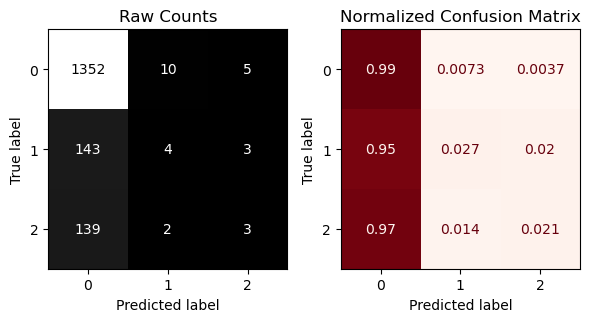

In [63]:
evaluate_classification(neigh, trainx_tf,trainy, testx_tf, testy)

### 4. Transform the data with PCA​

In [80]:
pca = PCA(n_components=.95)
Xtrain_pca = pca.fit_transform(trainx_tf)
Xtest_pca = pca.transform(testx_tf)
Xtrain_pca=pd.DataFrame(Xtrain_pca)
Xtrain_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-3.649680,0.764648,1.709007,-1.123493,-0.385363,-0.828005,-0.084729,-0.181392,0.786301,-0.028242,...,0.415098,-0.064180,0.012142,0.278319,0.029929,0.193466,0.112053,-0.319073,0.175273,-0.181487
1,-4.499968,2.256458,0.202801,-2.603137,0.878943,0.568911,-1.577361,-1.386312,-0.349421,-1.068728,...,0.397013,0.243662,0.401354,0.202655,0.444708,-0.782406,0.010937,0.079925,0.128944,0.191770
2,-3.733771,-1.710261,-0.506078,-1.630900,1.000118,-0.755961,0.428712,-1.465199,0.430562,1.163332,...,0.188764,-0.193246,-0.193239,0.036772,-0.556546,-0.009050,-0.198828,0.207212,0.115774,0.084848
3,-0.064294,0.613961,1.376443,1.926162,-1.452174,-0.440674,-0.373216,-0.123226,0.106464,-0.011144,...,-0.295137,0.579797,0.273783,-0.019271,-0.067888,-0.243633,0.006115,0.064843,-0.368699,-0.273660
4,8.389199,-3.711440,-1.582764,-0.216283,1.493663,-0.499062,0.533357,0.517210,2.802661,0.194003,...,0.013191,-0.190991,-0.600774,0.161755,0.731824,0.109117,-0.115755,-1.831016,1.866566,1.684008


PCA created 99 principal component 

### 5. Model - With PCA

In [81]:
#​​Fit a default KNN model to the PCA data.
neigh.fit(Xtrain_pca, trainy)

KNeighborsClassifier()

In [82]:
%%time
preds_pca = neigh.predict(Xtest_pca)

CPU times: total: 1.44 s
Wall time: 238 ms


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4085
           1       0.50      0.05      0.09       437
           2       0.68      0.04      0.08       460

    accuracy                           0.82      4982
   macro avg       0.67      0.36      0.36      4982
weighted avg       0.79      0.82      0.76      4982



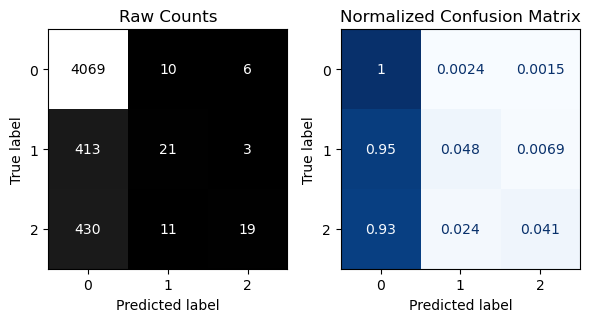


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1367
           1       0.19      0.02      0.04       150
           2       0.20      0.01      0.03       144

    accuracy                           0.82      1661
   macro avg       0.40      0.34      0.32      1661
weighted avg       0.71      0.82      0.75      1661



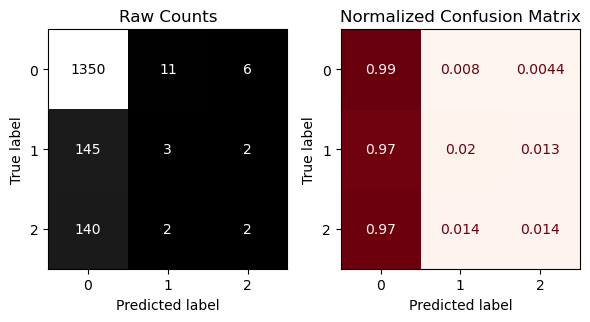

In [83]:
#Evaluate the model using multiple appropriate metrics
evaluate_classification(neigh, Xtrain_pca,trainy, Xtest_pca, testy)

### 6. Compare the models

Q1. How many features were used in the first model, and how many PCs were used in the PCA model? 
first model: all features were used in the first model (168)
PCA model: 166 PCs

Q2. Which model performed the best on the test set?
The classification metrics shows that models performed similary 

Q3. Which model was the fastest at making predictions?
the model with PCA model was the fastest at making predictions it tooks 1.44s as CPU time instead of 4.92s of CPU time for the first one. 